<a href="https://www.kaggle.com/code/johnolutoki/covid19-data-analysis-using-python?scriptVersionId=113420992" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Covid 19 Data Analysis


<p align="center">
  <img src="https://www.iotworldtoday.com/files/2020/03/coronavirus-crisis-management.jpg" />
</p>



Coronavirus disease (COVID-19) is an infectious disease caused by the SARS-CoV-2 virus.
Most people who fall sick with COVID-19 will experience mild to moderate symptoms and recover without special treatment. However, some will become seriously ill and require medical attention. it stuck the world and left a scathing mark.

In this analysis i'd show the effect of the virus on several country 

The data i used in this analysis was gotten from the WHO database

### Let's Import the modules 

We will start by importing some useful `python` `libraries`. ***Numpy*** and ***Pandas*** for performing mathematical operations and manipulating data; We will start by importing some useful python libraries. Numpy and Pandas for performing mathematical operations and manipulating data; Tabulate for pretty-printing pandas series and dataframes; ***Season and matplolib*** are visualizations libraries for building informing visuals.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

## INITIAL EXPLORATION

Importing Daily cases and deaths by date reported to WHO

In [2]:
df=pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-data.csv')
    
# df=pd.read_csv("../input/covid19/covid19_Confirmed_dataset.csv")
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


## Data Description

- `Date_reported` : Date of reporting to WHO
- `Country_code`: String	ISO Alpha-2 country code
- `Country`	String	Country, territory, area
- `WHO_region`	String	WHO regional offices: WHO Member States are grouped into six WHO regions -- Regional Office for Africa (AFRO), Regional Office for the Americas (AMRO), Regional Office for South-East Asia (SEARO), Regional Office for Europe (EURO), Regional Office for the Eastern Mediterranean (EMRO), and Regional Office for the Western Pacific (WPRO).
- `New_cases`	Integer 	New confirmed cases. Calculated by subtracting previous cumulative case count from current cumulative cases count.*
- `Cumulative_cases`	Integer	Cumulative confirmed cases reported to WHO to date.
- `New_deaths`	Integer	New confirmed deaths. Calculated by subtracting previous cumulative deaths from current cumulative deaths.*
- `Cumulative_deaths`	Integer	Cumulative confirmed deaths reported to WHO to date.

In [3]:
df.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,2.540640e+05,2.540640e+05,254064.00000,2.540640e+05
mean,2.534304e+03,1.006535e+06,26.09611,1.497804e+04
std,1.611180e+04,4.795051e+06,147.78297,6.605257e+04
min,-8.261000e+03,0.000000e+00,-2437.00000,0.000000e+00
25%,0.000000e+00,7.640000e+02,0.00000,8.000000e+00
50%,1.700000e+01,2.112100e+04,0.00000,2.640000e+02
75%,4.410000e+02,2.721542e+05,5.00000,4.218000e+03
max,1.265520e+06,9.807247e+07,11447.00000,1.074367e+06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254064 entries, 0 to 254063
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date_reported      254064 non-null  object
 1   Country_code       252992 non-null  object
 2   Country            254064 non-null  object
 3   WHO_region         254064 non-null  object
 4   New_cases          254064 non-null  int64 
 5   Cumulative_cases   254064 non-null  int64 
 6   New_deaths         254064 non-null  int64 
 7   Cumulative_deaths  254064 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 15.5+ MB


In [5]:
df.shape

(254064, 8)

In [6]:
df.describe(include='all')

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,254064,252992,254064,254064,2.540640e+05,2.540640e+05,254064.00000,2.540640e+05
unique,1072,236,237,7,NaN,NaN,NaN,NaN
top,2021-05-12,BA,Singapore,EURO,NaN,NaN,NaN,NaN
freq,237,1072,1072,66464,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.534304e+03,1.006535e+06,26.09611,1.497804e+04
std,NaN,NaN,NaN,NaN,1.611180e+04,4.795051e+06,147.78297,6.605257e+04
min,NaN,NaN,NaN,NaN,-8.261000e+03,0.000000e+00,-2437.00000,0.000000e+00
25%,NaN,NaN,NaN,NaN,0.000000e+00,7.640000e+02,0.00000,8.000000e+00
50%,NaN,NaN,NaN,NaN,1.700000e+01,2.112100e+04,0.00000,2.640000e+02
75%,NaN,NaN,NaN,NaN,4.410000e+02,2.721542e+05,5.00000,4.218000e+03


## Initial Notes

- The dataset comprises 254064 rows and 8 columns.
- Just one of those columns (`Country_code`) contains about `1142` missing datas
- Date data `(Date_reported)` are stored as object data instead of datetime or numerical data and it contains about 1072 unique datas

## Objectives 
I'd be moving forward with the following rows and columns and I'd be answering the following question
- What `countries` have the highest number of new cases and death
- What `countries` have the highest number of cumulative cases and deaths
- What `WHO_region` which also signifies each continent are mostly affected 
- Using the vaccination information also to answer likely causes of why the countries have the most deaths 

## Removing Unwanetd Columns and Converting the date from object to datetime format
`Country_code` seems to be the same with the country itsef so i am going to drop the country code and converting the `Date_reported` column from object to datetime format to enable me remove the year since that's all i want to deal with

In [7]:
df['Date_reported'] = pd.to_datetime(df['Date_reported'], errors='coerce')


In [8]:
df['year'] = df['Date_reported'].dt.year

In [9]:
df.drop(['Country_code','Date_reported'],axis=1,inplace=True)
df.head(10)

,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,year
0,Afghanistan,EMRO,0,0,0,0,2020
1,Afghanistan,EMRO,0,0,0,0,2020
2,Afghanistan,EMRO,0,0,0,0,2020
3,Afghanistan,EMRO,0,0,0,0,2020
4,Afghanistan,EMRO,0,0,0,0,2020
5,Afghanistan,EMRO,0,0,0,0,2020
6,Afghanistan,EMRO,0,0,0,0,2020
7,Afghanistan,EMRO,0,0,0,0,2020
8,Afghanistan,EMRO,0,0,0,0,2020
9,Afghanistan,EMRO,0,0,0,0,2020


In [10]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bonaire',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', 'Côte d’Ivoire', 'Croatia', 'Cuba', 'Curaçao',
       'Cyprus', 'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvado

## Flitering the data to better understand  and answer the question. 

Let's take a look at some few countries and see the recent cases announced 

Aggregating the rows by each country for better understanding on how each country were affected 

In [11]:
covid_Cumulative_cases = pd.DataFrame(df.groupby("Country")['Cumulative_cases']
                               .agg('sum')).sort_values(by='Cumulative_cases',ascending=False,axis=0)

covid_Cumulative_cases.head()

,Cumulative_cases
Country,
United States of America,44009292109
India,25065073436
Brazil,17812323176
France,12051772224
Germany,10343024845


In [12]:
covid_Cumulative_cases = pd.DataFrame(df.groupby("Country")['Cumulative_cases']
                               .agg('sum')).sort_values(by='Cumulative_cases',ascending=True,axis=0)

covid_Cumulative_cases.head(20)

,Cumulative_cases
Country,
Democratic People's Republic of Korea,0
Tokelau,0
Turkmenistan,0
Pitcairn Islands,572
Niue,12871
Holy See,22730
Tuvalu,70117
Saint Helena,160706
Saba,184969


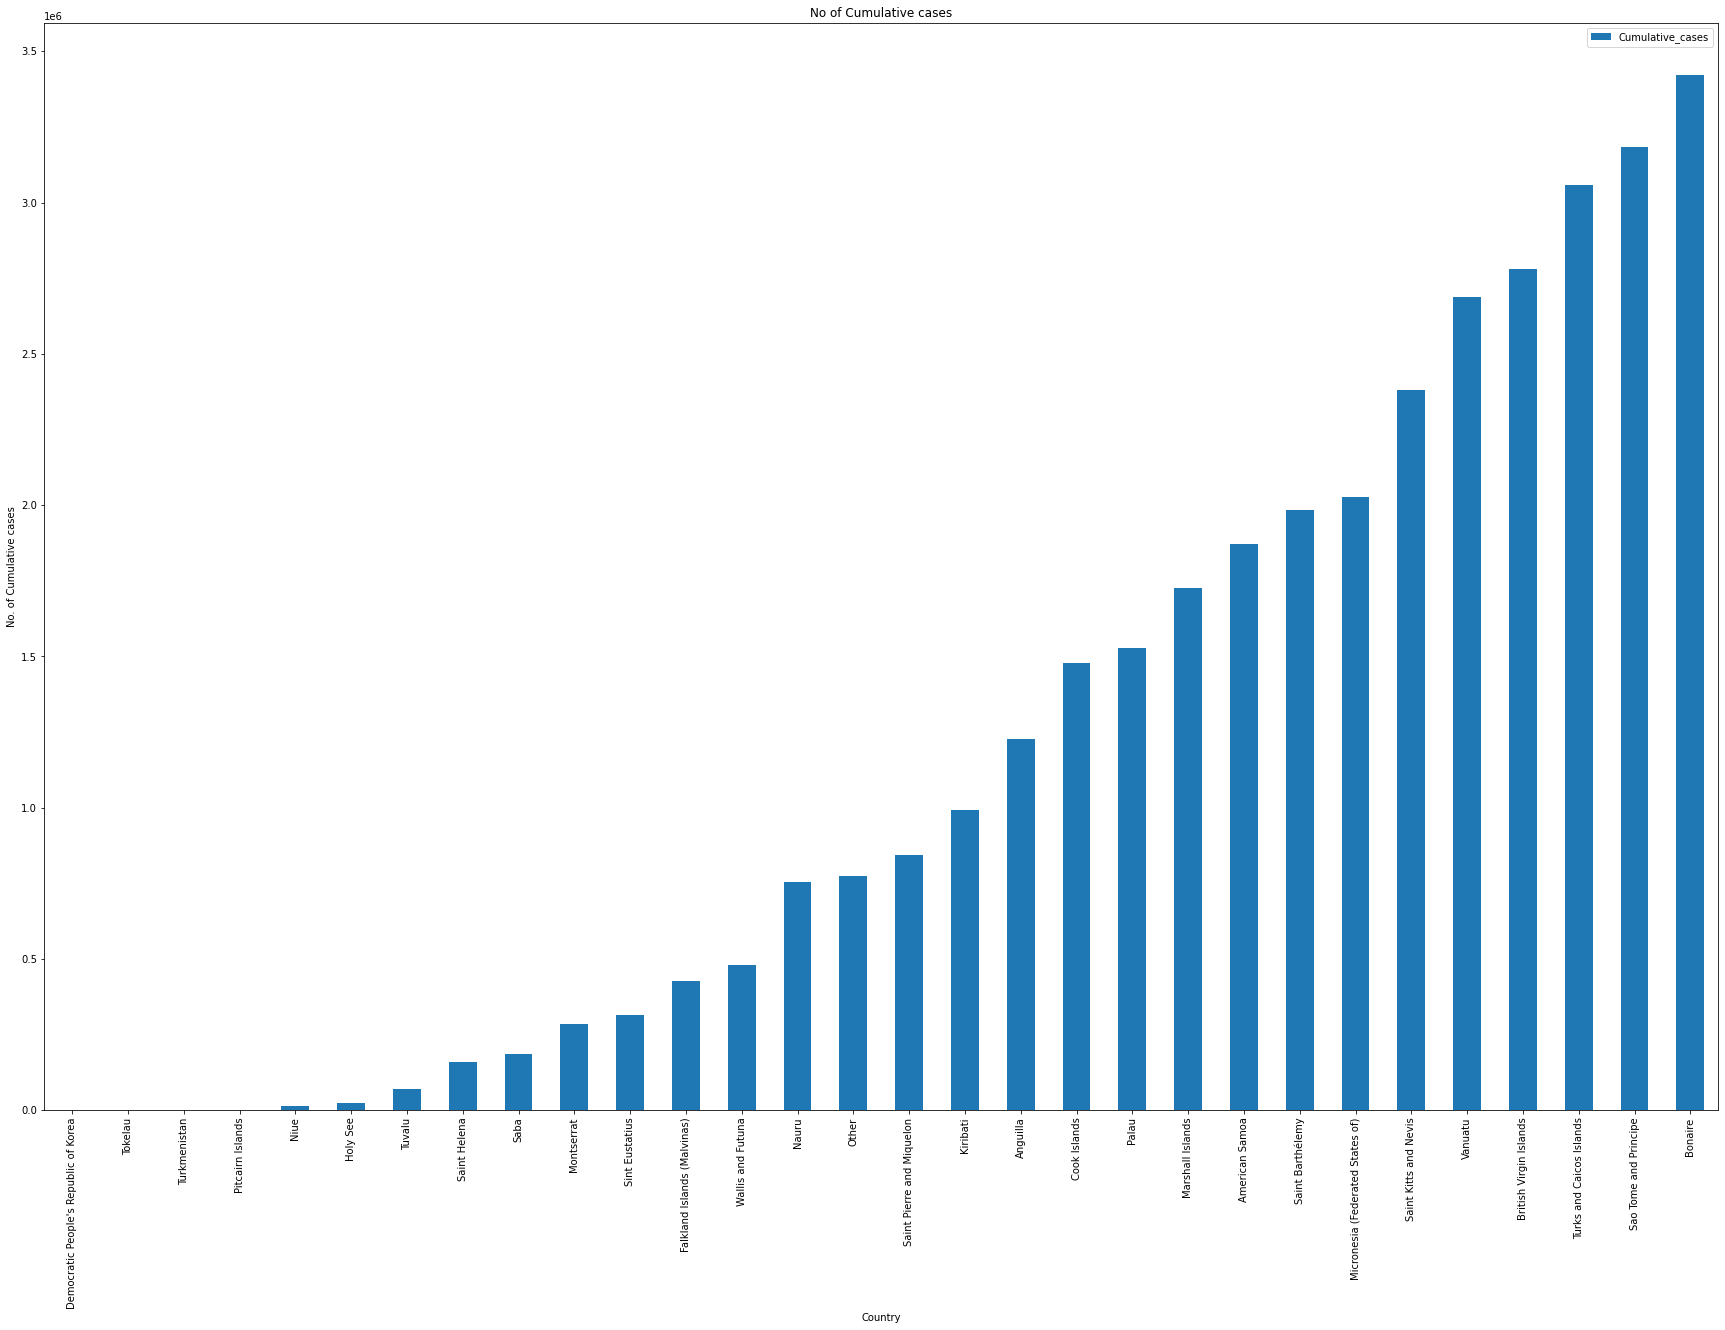

In [13]:
covid_Cumulative_cases.head(30).plot(kind='bar',  xlabel = 'Country', ylabel = 'No. of Cumulative cases',title = 'No of Cumulative cases', figsize=(30,20))
plt.show()


In [14]:
covid_new_cases = pd.DataFrame(df.groupby("Country")['New_cases']
                               .agg('sum')).sort_values(by='New_cases',ascending=False,axis=0)

covid_new_cases.head()

,New_cases
Country,
United States of America,98072469
India,44674439
France,37252086
Germany,36726061
Brazil,35497781


In [15]:
covid_new_cases = pd.DataFrame(df.groupby("Country")['New_cases']
                               .agg('sum')).sort_values(by='New_cases',ascending=True,axis=0)

covid_new_cases.head(10)

,New_cases
Country,
Tokelau,0
Democratic People's Republic of Korea,0
Turkmenistan,0
Pitcairn Islands,4
Holy See,26
Niue,187
Saba,736
Other,764
Sint Eustatius,1210


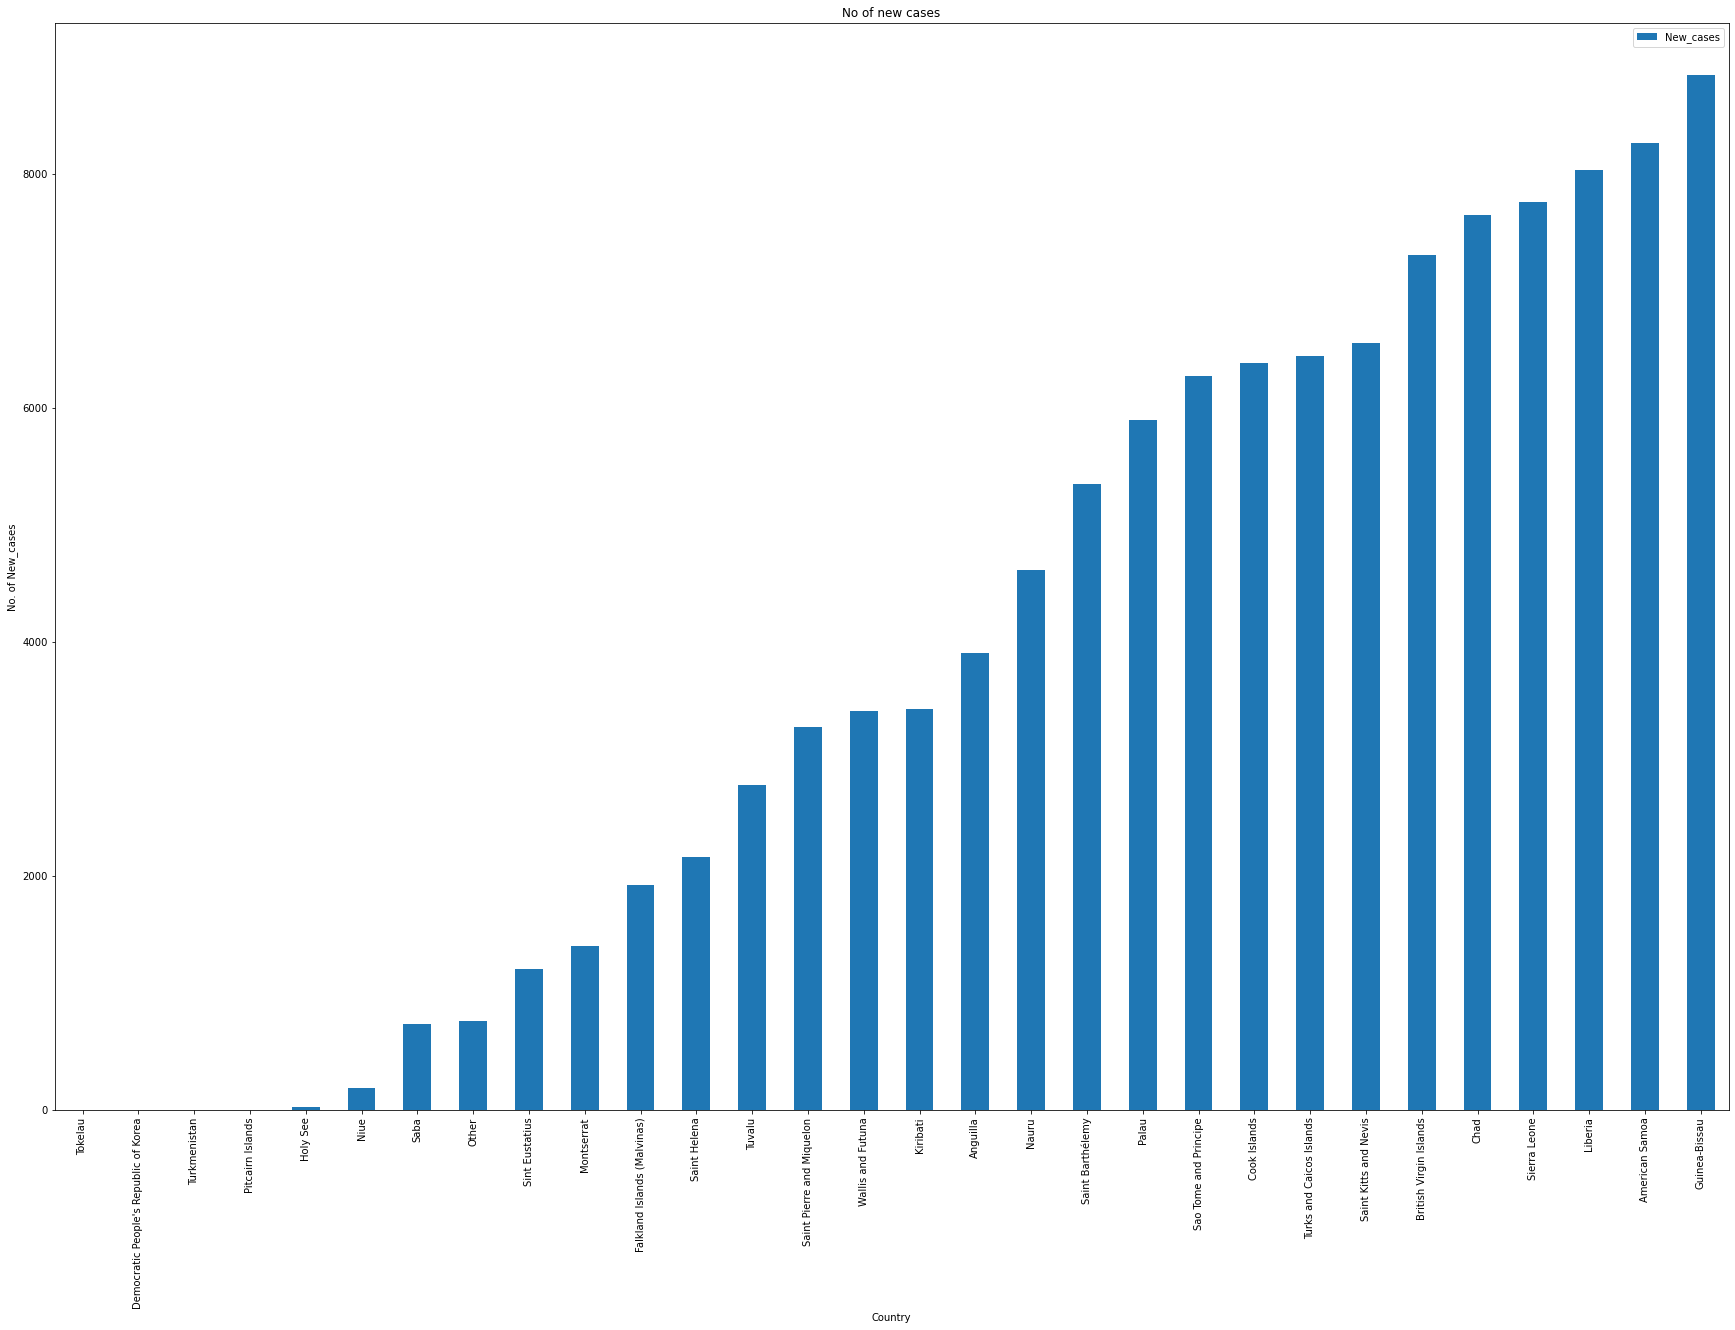

In [16]:
covid_new_cases.head(30).plot(kind='bar',  xlabel = 'Country', ylabel = 'No. of New_cases',title = 'No of new cases', figsize=(30,20))
plt.show()

The USA seems to have the highest number of cases followed close by India, at the beginning of the pandemic countries with huge populations were expected to be in serious crises because the virus is easily transmissible but now we have more cases in the USA than India. 

In [17]:
covid_new_death = pd.DataFrame(df.groupby("Country")['New_deaths']
                               .agg('sum')).sort_values(by='New_deaths',ascending=False,axis=0)

covid_new_death.head()

,New_deaths
Country,
United States of America,1074367
Brazil,690577
India,530653
Russian Federation,392506
Mexico,330633


In [18]:
covid_new_death = pd.DataFrame(df.groupby("Country")['New_deaths']
                               .agg('sum')).sort_values(by='New_deaths',ascending=True,axis=0)

covid_new_death.head(10)

,New_deaths
Country,
Tuvalu,0
Turkmenistan,0
Niue,0
Holy See,0
Democratic People's Republic of Korea,0
Tokelau,0
Saint Helena,0
Falkland Islands (Malvinas),0
Pitcairn Islands,0


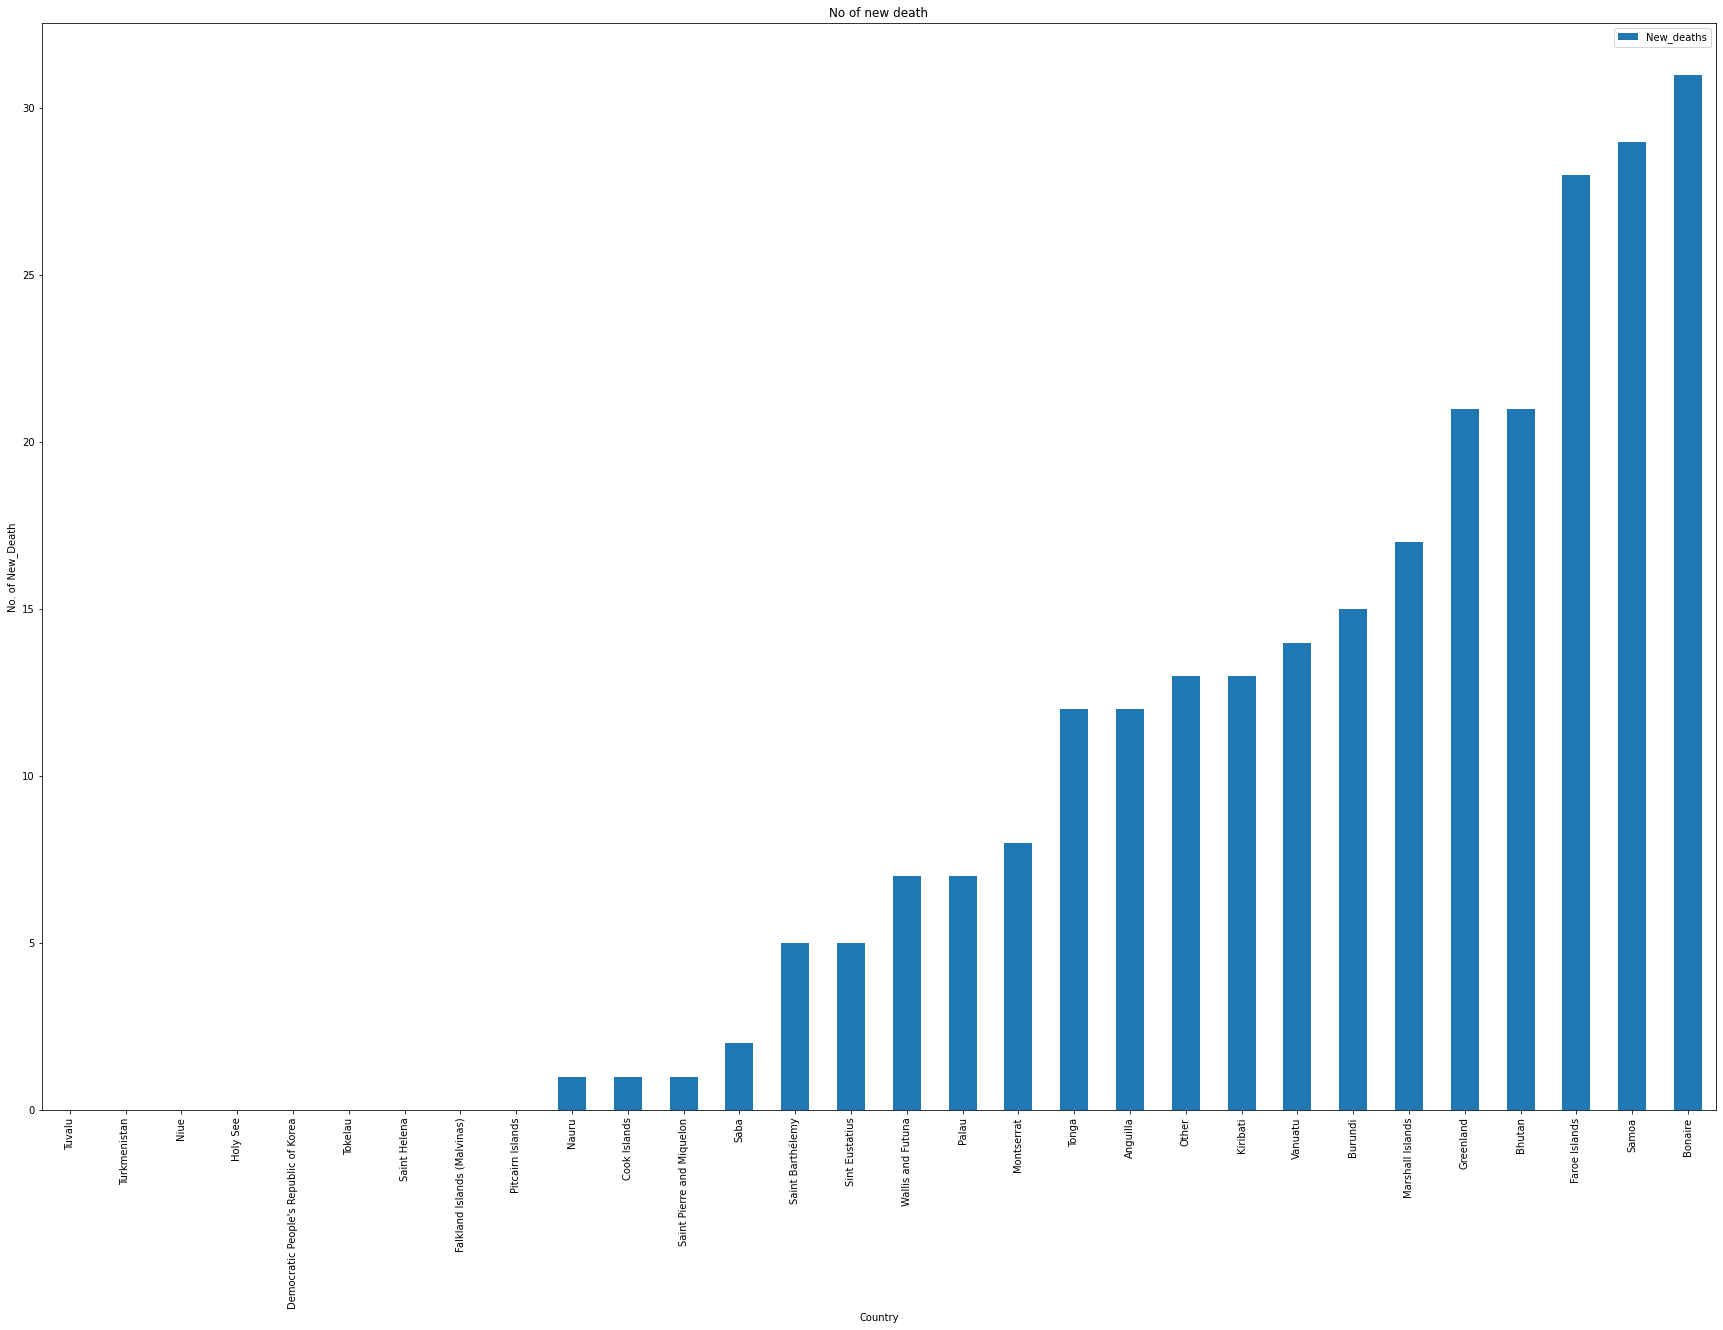

In [19]:
covid_new_death.head(30).plot(kind='bar',  xlabel = 'Country', ylabel = 'No. of New_Death',title = 'No of new death', figsize=(30,20))
plt.show()

In [20]:
covid_Cumulative_deaths = pd.DataFrame(df.groupby("Country")['Cumulative_deaths']
                               .agg('sum')).sort_values(by='Cumulative_deaths',ascending=False,axis=0)

covid_Cumulative_deaths.head()

,Cumulative_deaths
Country,
United States of America,612259960
Brazil,423980123
India,316634202
Mexico,220520721
Russian Federation,189793422


In [21]:
covid_Cumulative_deaths = pd.DataFrame(df.groupby("Country")['Cumulative_deaths']
                               .agg('sum')).sort_values(by='Cumulative_deaths',ascending=True,axis=0)

covid_Cumulative_deaths.head(10)

,Cumulative_deaths
Country,
Tuvalu,0
Niue,0
Tokelau,0
Democratic People's Republic of Korea,0
Turkmenistan,0
Saint Helena,0
Holy See,0
Falkland Islands (Malvinas),0
Pitcairn Islands,0


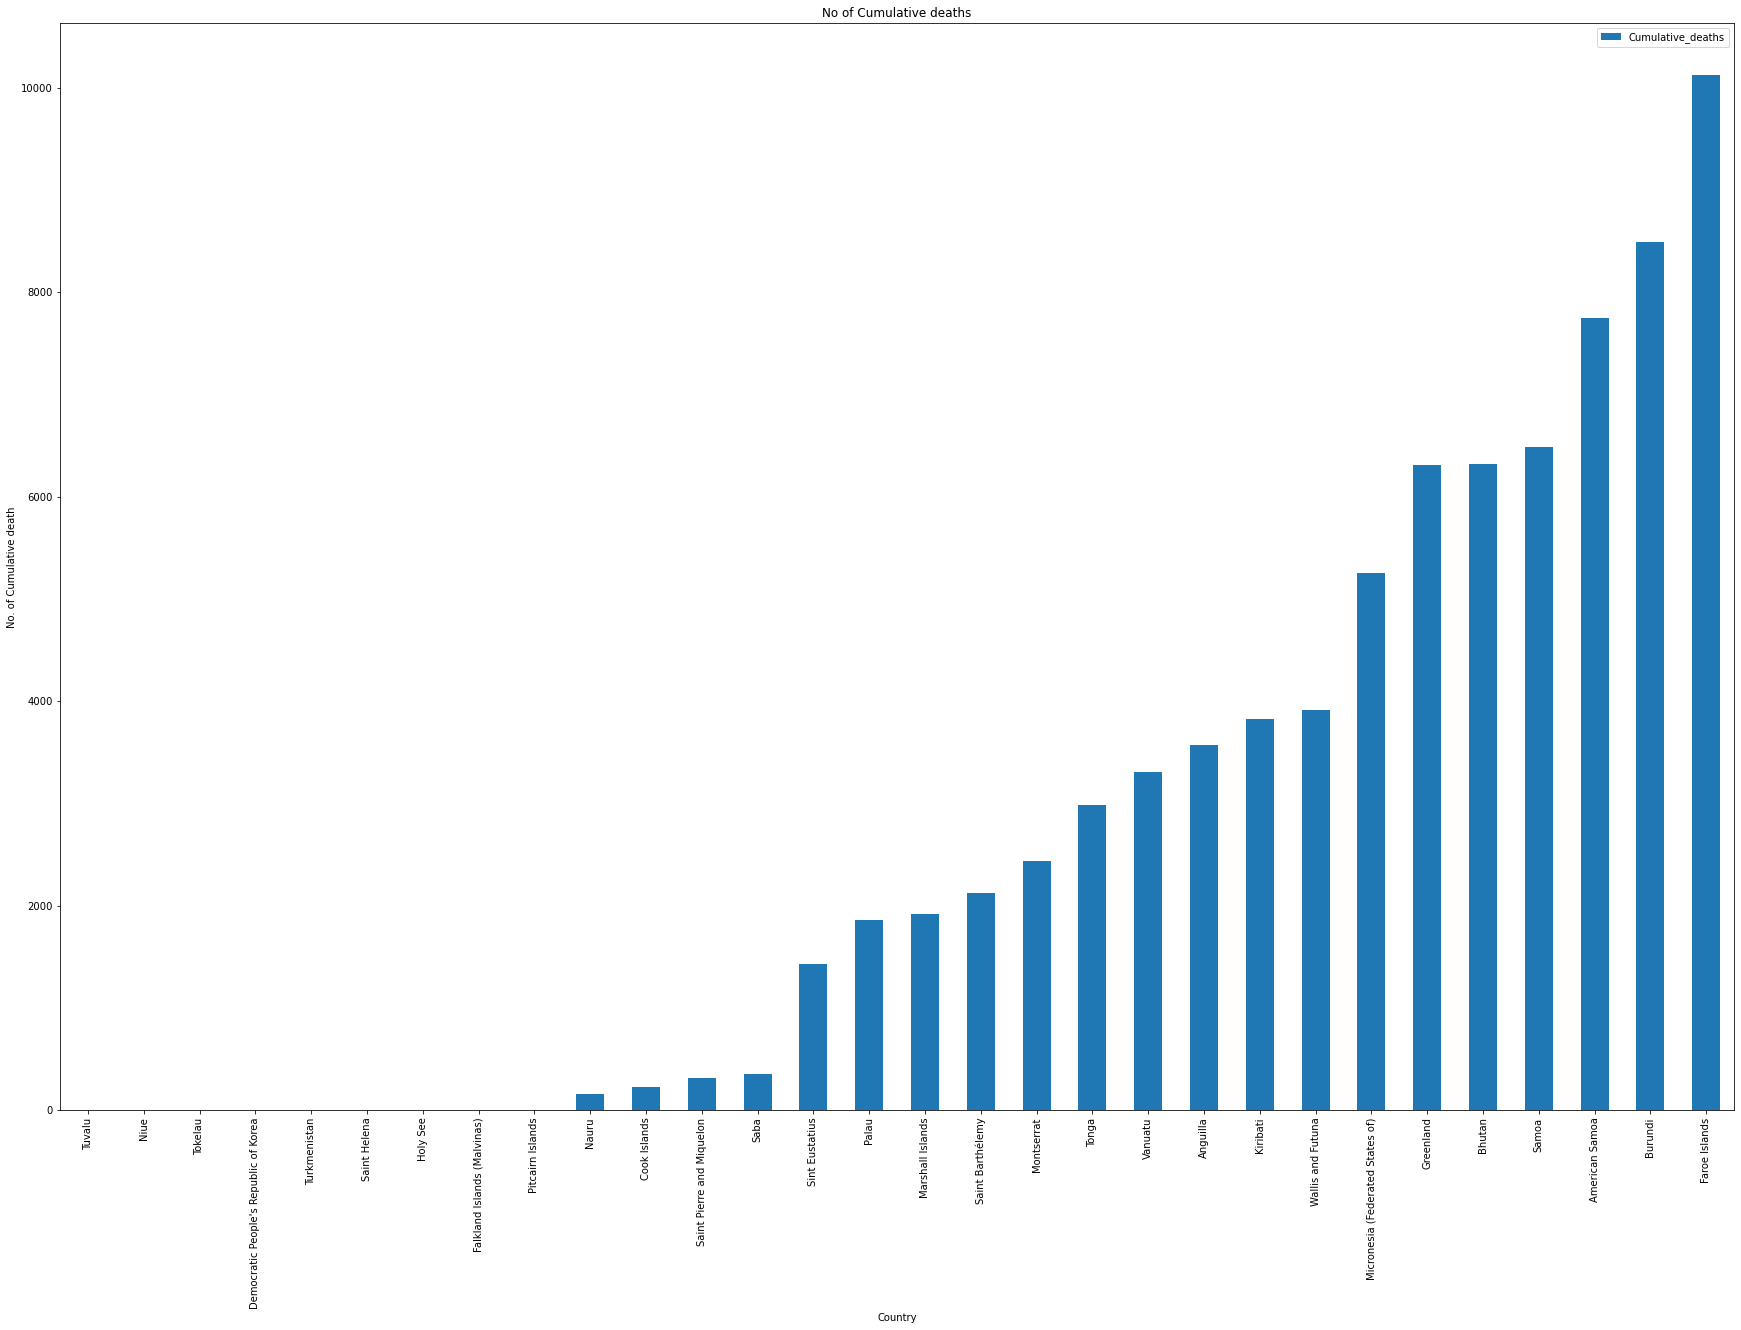

In [22]:
covid_Cumulative_deaths.head(30).plot(kind='bar',  xlabel = 'Country', ylabel = 'No. of Cumulative death',title = 'No of Cumulative deaths', figsize=(30,20))
plt.show()

In [23]:
covid_cum_new_year = pd.DataFrame(df.groupby(["Country",'year'])['Cumulative_cases']
                               .agg('sum')).sort_values(by=['year', 'Cumulative_cases'],ascending=False,axis=0)

covid_cum_new_year.head(10)

,,Cumulative_cases
Country,year,
United States of America,2022,29228485077
India,2022,14800509458
Brazil,2022,10760754330
France,2022,9808101179
Germany,2022,8848865014
The United Kingdom,2022,7461849488
Russian Federation,2022,6207345288
Italy,2022,6148389814
Republic of Korea,2022,5679868411


In [24]:
covid_cum_new_year = pd.DataFrame(df.groupby(["Country",'year'])['Cumulative_cases']
                               .agg('sum')).sort_values(by=['year', 'Cumulative_cases'],ascending=True,axis=0)

covid_cum_new_year.head(10)

,,Cumulative_cases
Country,year,
American Samoa,2020,0
Cook Islands,2020,0
Democratic People's Republic of Korea,2020,0
Kiribati,2020,0
Micronesia (Federated States of),2020,0
Nauru,2020,0
Niue,2020,0
Palau,2020,0
Pitcairn Islands,2020,0


In [25]:
covid_New_cases_year = pd.DataFrame(df.groupby(["Country",'year'])['New_cases']
                               .agg('sum')).sort_values(by=['year', 'New_cases'],ascending=False,axis=0)

covid_New_cases_year.head(10)

,,New_cases
Country,year,
United States of America,2022,44538183
Germany,2022,29559430
France,2022,27769504
Republic of Korea,2022,26980720
Japan,2022,23954473
Italy,2022,18506652
Brazil,2022,13233947
Russian Federation,2022,11150677
The United Kingdom,2022,10611941


In [26]:
covid_New_cases_year = pd.DataFrame(df.groupby(["Country",'year'])['New_cases']
                               .agg('sum')).sort_values(by=['year', 'New_cases'],ascending=True,axis=0)

covid_New_cases_year.head(10)

,,New_cases
Country,year,
American Samoa,2020,0
Cook Islands,2020,0
Democratic People's Republic of Korea,2020,0
Kiribati,2020,0
Micronesia (Federated States of),2020,0
Nauru,2020,0
Niue,2020,0
Palau,2020,0
Pitcairn Islands,2020,0


In [27]:
covid_cum_death_cases_year = pd.DataFrame(df.groupby(["Country",'year'])['Cumulative_deaths']
                               .agg('sum')).sort_values(by=['year', 'Cumulative_deaths'],ascending=False,axis=0)

covid_cum_death_cases_year.head(10)

,,Cumulative_deaths
Country,year,
United States of America,2022,341222691
Brazil,2022,228693309
India,2022,178553647
Russian Federation,2022,127645694
Mexico,2022,111579120
Peru,2022,73045264
The United Kingdom,2022,61296427
Italy,2022,56980267
Indonesia,2022,53102107


In [28]:
covid_new_death_cases_year = pd.DataFrame(df.groupby(["Country",'year'])['New_deaths']
                               .agg('sum')).sort_values(by=['year', 'New_deaths'],ascending=False,axis=0)

covid_new_death_cases_year.head(10)

,,New_deaths
Country,year,
United States of America,2022,255312
Russian Federation,2022,83646
Brazil,2022,71760
India,2022,49573
The United Kingdom,2022,47796
Italy,2022,44486
Germany,2022,40515
France,2022,34936
Japan,2022,32669


The USA seems to have the highest number of deaths again followed close by brazil this time, then India. There seems to be a change in the list of countries with death cases as compared to the countries with new cases. 

The United States of America (USA) has the most examples, as was demonstrated above. The following explanation of the causes of the high number of instances in the USA highlights the first and most important factor: the tardy response. The US government took a long time to respond to the problem, which allowed the virus to spread further. The US government took a long time to set up a health care system, stop other travel, and do covid-19 tests. Additionally, the populace was unaware of the rules established to stop the virus's transmission, such as banning the wearing of facial coverings. Some American states lacked the testing infrastructure necessary to thoroughly test their residents.

In [29]:
cases_2020 = df[df['year']== 2020]

cases_2020.head()

,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,year
0,Afghanistan,EMRO,0,0,0,0,2020
1,Afghanistan,EMRO,0,0,0,0,2020
2,Afghanistan,EMRO,0,0,0,0,2020
3,Afghanistan,EMRO,0,0,0,0,2020
4,Afghanistan,EMRO,0,0,0,0,2020


In [30]:
covid_New_cases_year_cases_2020 = pd.DataFrame(cases_2020.groupby(["Country",'year'])['New_cases']
                               .agg('sum')).sort_values(by=['year', 'New_cases'],ascending=False,axis=0)

covid_New_cases_year_cases_2020.head(10)

,,New_cases
Country,year,
United States of America,2020,19577585
India,2020,10266674
Brazil,2020,7563551
Russian Federation,2020,3159297
France,2020,2564972
The United Kingdom,2020,2563566
Türkiye,2020,2194272
Italy,2020,2083689
Spain,2020,1955216


In [31]:
covid_New_cases_year_cases_2020 = pd.DataFrame(cases_2020.groupby(["Country",'year'])['New_cases']
                               .agg('sum')).sort_values(by=['year', 'New_cases'],ascending=True,axis=0)

covid_New_cases_year_cases_2020.head(10)

,,New_cases
Country,year,
American Samoa,2020,0
Cook Islands,2020,0
Democratic People's Republic of Korea,2020,0
Kiribati,2020,0
Micronesia (Federated States of),2020,0
Nauru,2020,0
Niue,2020,0
Palau,2020,0
Pitcairn Islands,2020,0


In [32]:
cases_2021 = df[df['year']== 2021]

cases_2021.head()

,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,year
364,Afghanistan,EMRO,183,52513,12,2201,2021
365,Afghanistan,EMRO,73,52586,10,2211,2021
366,Afghanistan,EMRO,123,52709,10,2221,2021
367,Afghanistan,EMRO,200,52909,9,2230,2021
368,Afghanistan,EMRO,102,53011,7,2237,2021


In [33]:
covid_New_cases_year_cases_2021 = pd.DataFrame(cases_2021.groupby(["Country",'year'])['New_cases']
                               .agg('sum')).sort_values(by=['year', 'New_cases'],ascending=False,axis=0)

covid_New_cases_year_cases_2021.head(10)

,,New_cases
Country,year,
United States of America,2021,33956701
India,2021,24572130
Brazil,2021,14700283
The United Kingdom,2021,10878069
Russian Federation,2021,7340685
Türkiye,2021,7247492
France,2021,6917610
Germany,2021,5431600
Iran (Islamic Republic of),2021,4973945


In [34]:
covid_New_cases_year_cases_2021 = pd.DataFrame(cases_2021.groupby(["Country",'year'])['New_cases']
                               .agg('sum')).sort_values(by=['year', 'New_cases'],ascending=True,axis=0)

covid_New_cases_year_cases_2021.head(10)

,,New_cases
Country,year,
Cook Islands,2021,0
Democratic People's Republic of Korea,2021,0
Holy See,2021,0
Kiribati,2021,0
Marshall Islands,2021,0
Micronesia (Federated States of),2021,0
Nauru,2021,0
Niue,2021,0
Pitcairn Islands,2021,0


In [35]:
cases_2022 = df[df['year']== 2022]

cases_2022.head()

,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,year
729,Afghanistan,EMRO,0,158059,0,7356,2022
730,Afghanistan,EMRO,53,158112,0,7356,2022
731,Afghanistan,EMRO,44,158156,5,7361,2022
732,Afghanistan,EMRO,15,158171,3,7364,2022
733,Afghanistan,EMRO,36,158207,2,7366,2022


In [36]:
covid_New_cases_year_cases_2022 = pd.DataFrame(cases_2022.groupby(["Country",'year'])['New_cases']
                               .agg('sum')).sort_values(by=['year', 'New_cases'],ascending=False,axis=0)

covid_New_cases_year_cases_2022.head(10)

,,New_cases
Country,year,
United States of America,2022,44538183
Germany,2022,29559430
France,2022,27769504
Republic of Korea,2022,26980720
Japan,2022,23954473
Italy,2022,18506652
Brazil,2022,13233947
Russian Federation,2022,11150677
The United Kingdom,2022,10611941


In [37]:
covid_New_cases_year_cases_2022 = pd.DataFrame(cases_2022.groupby(["Country",'year'])['New_cases']
                               .agg('sum')).sort_values(by=['year', 'New_cases'],ascending=True,axis=0)

covid_New_cases_year_cases_2022.head(10)

,,New_cases
Country,year,
Democratic People's Republic of Korea,2022,0
Holy See,2022,0
Other,2022,0
Tokelau,2022,0
Turkmenistan,2022,0
Pitcairn Islands,2022,4
Niue,2022,187
Tajikistan,2022,293
Saba,2022,705


## Bivariate Analysis

I employ some bivariate analysis to see the relationship Between the no of cases and deaths

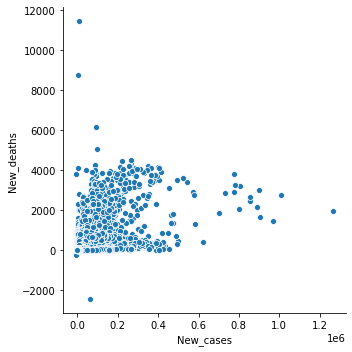

In [38]:
sns.relplot(data = df, x ='New_cases', y = 'New_deaths')
plt.show()

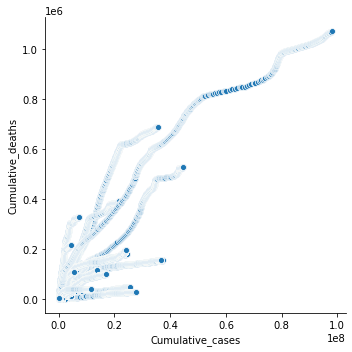

In [39]:
sns.relplot(data = df, x ='Cumulative_cases', y = 'Cumulative_deaths')
plt.show()

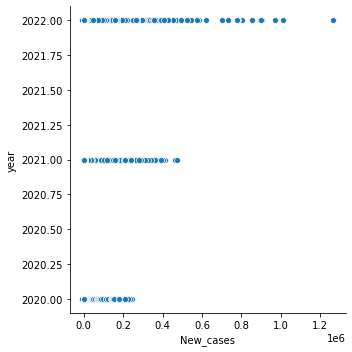

In [40]:
sns.relplot(data = df, x ='New_cases', y = 'year')
plt.show()

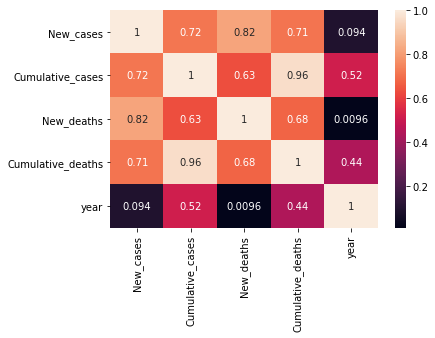

In [41]:
sns.heatmap(df.corr(method='spearman'),annot=True)


Overall there seems to be a strong correlation between cases and deaths both in the cumulative and the new ones.

## Scatter plot showing the correlation

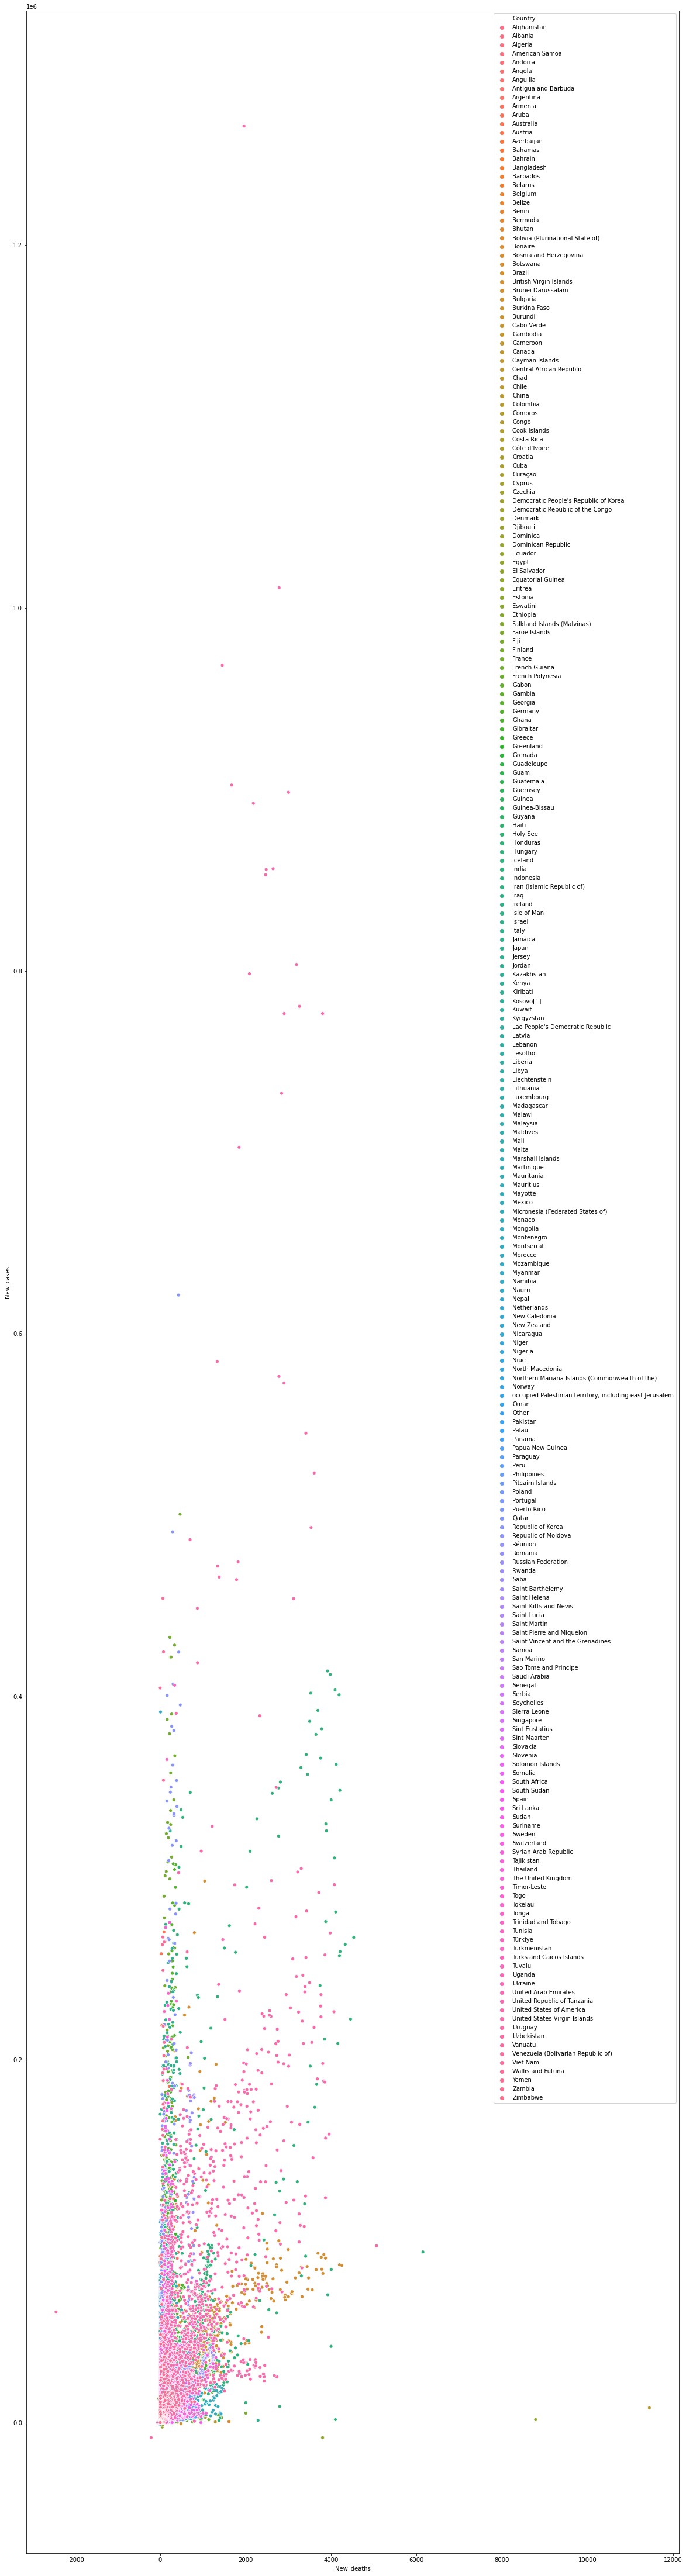

In [42]:
# Scatter plot showing the relation btw (correlation) number of new cases, deaths

fig,ax=plt.subplots(figsize=(20,80))
sns.scatterplot(data=df, x ='New_deaths',y ='New_cases', hue= 'Country',ax=ax)
plt.show()

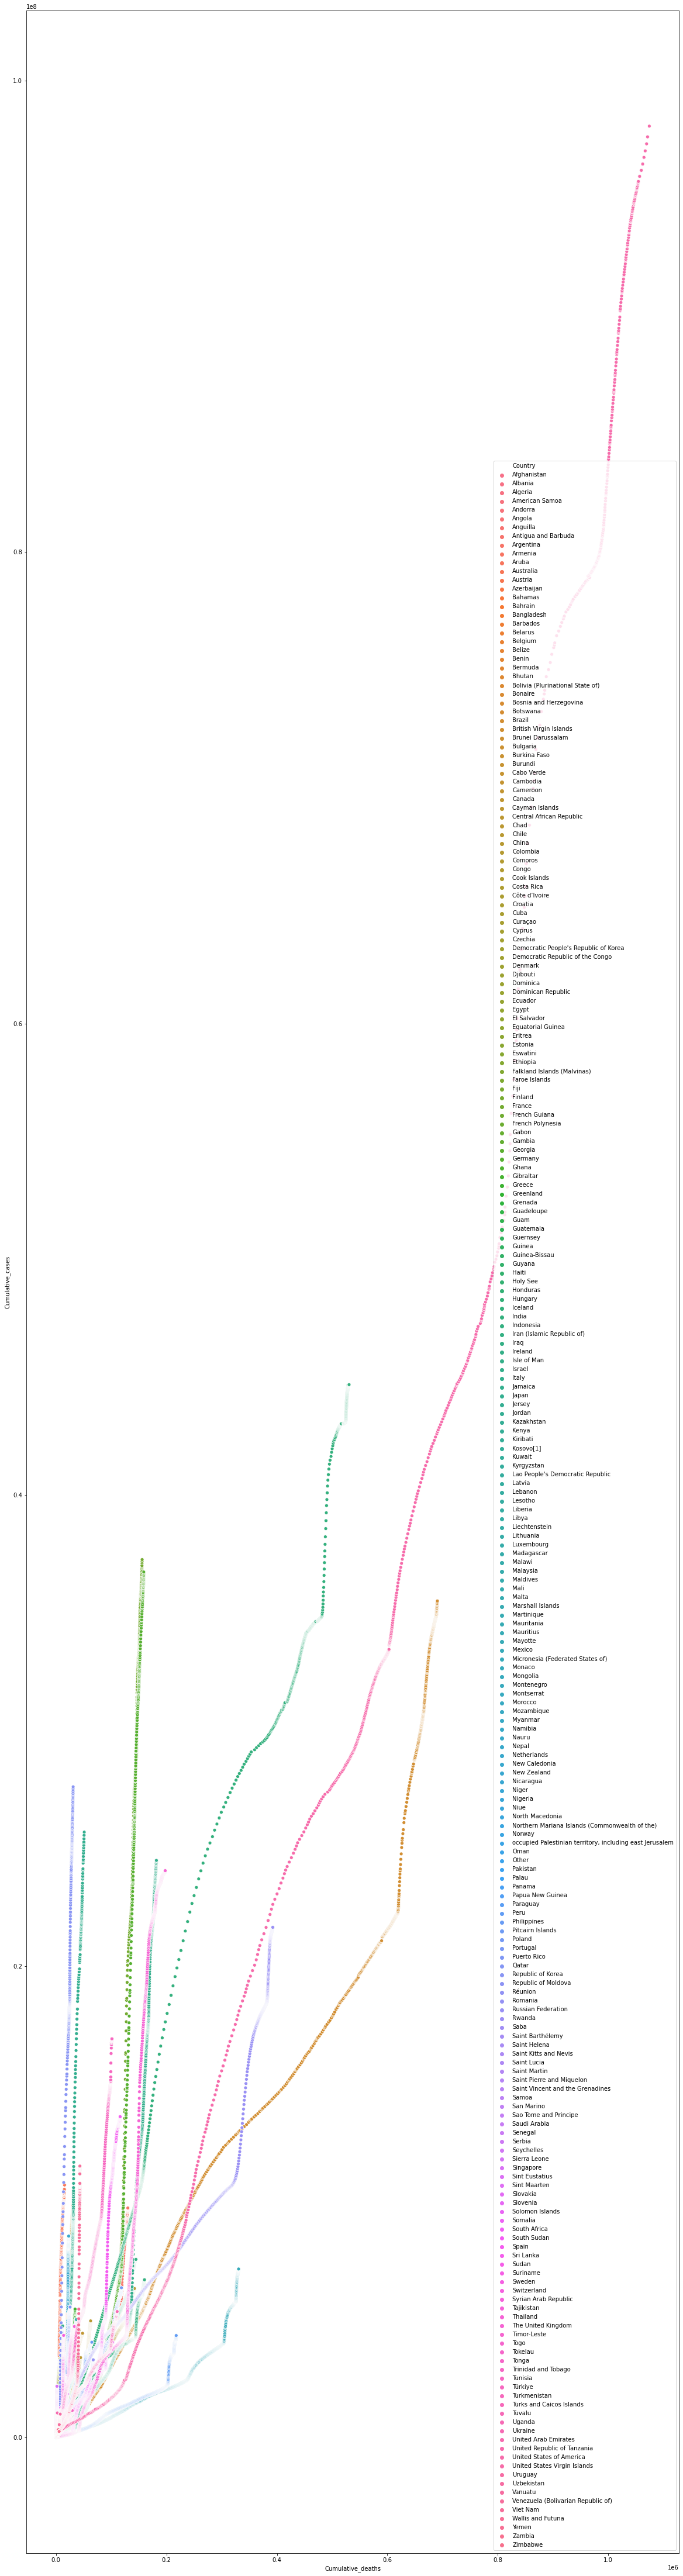

In [43]:
# Scatter plot showing the relation btw (correlation) number cumulative of cases, and number of deaths

fig,ax=plt.subplots(figsize=(20,80))
sns.scatterplot(data=df, x ='Cumulative_deaths',y ='Cumulative_cases', hue= 'Country',ax=ax)
plt.show()

## What `WHO_region` which also signifies each continents are mostly affected

In [44]:
covid_region_Cumulative_deaths = pd.DataFrame(df.groupby("WHO_region")['Cumulative_deaths']
                               .agg('sum')).sort_values(by='Cumulative_deaths',ascending=False,axis=0)

covid_region_Cumulative_deaths

,Cumulative_deaths
WHO_region,
AMRO,1739617440
EURO,1184598132
SEARO,457787842
EMRO,211724672
WPRO,108505286
AFRO,103133929
Other,13024


In [45]:
covid_region_New_deaths = pd.DataFrame(df.groupby("WHO_region")['New_deaths']
                               .agg('sum')).sort_values(by='New_deaths',ascending=False,axis=0)

covid_region_New_deaths

,New_deaths
WHO_region,
AMRO,2876420
EURO,2141235
SEARO,802333
EMRO,348953
WPRO,286193
AFRO,174935
Other,13


In [46]:
covid_region_Cumulative_cases = pd.DataFrame(df.groupby("WHO_region")['Cumulative_cases']
                               .agg('sum')).sort_values(by='Cumulative_cases',ascending=False,axis=0)

covid_region_Cumulative_cases

,Cumulative_cases
WHO_region,
EURO,98439059615
AMRO,84955074114
SEARO,32274298205
WPRO,22968707694
EMRO,12188038971
AFRO,4898366243
Other,773024


In [47]:
covid_region_New_cases = pd.DataFrame(df.groupby("WHO_region")['New_cases']
                               .agg('sum')).sort_values(by='New_cases',ascending=False,axis=0)

covid_region_New_cases

,New_cases
WHO_region,
EURO,266656115
AMRO,183240642
WPRO,100663304
SEARO,60695297
EMRO,23203392
AFRO,9415892
Other,764


The Regional Office for the Americas (AMRO) has more new death and cumulative death than the Regional Office for Europe (EURO) even tho they had more cases than them, however the two continent with the most population has less death than Europe and America, I went to check WHO for more data and it was reported that Africa has underreported cases, I wanted to know the country with the that conducted test the most but the doesn't seem to be available, to intrigue further I'd check the vaccination rate.

## Looking at the Vaccination database

To intrigue further at why the USA seem to have such numbers in the number of deaths and cases, I'd intrigue further using the vaccination database

In [48]:
Vaccinated =pd.read_csv('https://covid19.who.int/who-data/vaccination-data.csv')
    
Vaccinated.head()

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Afghanistan,AFG,EMRO,REPORTING,2022-12-05,12304901.0,11320910.0,31.609,29.081,10615628,27.270,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-02-22,11.0,NaN,NaN
1,Albania,ALB,EURO,REPORTING,2022-11-13,3011499.0,1340678.0,104.600,47.108,1268200,44.561,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...",2021-01-13,5.0,371665.0,13.059
2,Algeria,DZA,AFRO,REPORTING,2022-09-04,15267442.0,7840131.0,34.817,17.879,6481186,14.780,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...",2021-01-30,4.0,575651.0,1.313
3,American Samoa,ASM,WPRO,REPORTING,2022-08-23,111316.0,44885.0,201.670,81.318,41423,75.046,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",2020-12-21,3.0,24160.0,43.770
4,Andorra,AND,EURO,REPORTING,2022-11-13,154367.0,57901.0,199.800,76.009,53485,70.211,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...",2021-01-20,3.0,42981.0,56.423


## Data Description 
* `COUNTRY` 	 String 	Country, territory, area
* `ISO3` 	String	ISO Alpha-3 country code
* `WHO_REGION`  	String	WHO regional offices: WHO Member States are grouped into six WHO regions: Regional Office for Africa (AFRO), Regional Office for the Americas (AMRO), Regional Office for South-East Asia (SEARO), Regional Office for Europe (EURO), Regional Office for the Eastern Mediterranean (EMRO), and Regional Office for the Western Pacific (WPRO).
* `DATA_SOURCE` 	String	Indicates data source: - REPORTING: Data reported by Member States, or sourced from official reports - OWID: Data sourced from Our World in Data: https://ourworldindata.org/covid-vaccinations
* `DATE_UPDATED`	Date	Date of last update
* `TOTAL_VACCINATIONS`  	Integer	Cumulative total vaccine doses administered
* `PERSONS_VACCINATED_1PLUS_DOSE`   	Decimal	Cumulative number of persons vaccinated with at least one dose
* `TOTAL_VACCINATIONS_PER100`   	Integer	Cumulative total vaccine doses administered per 100 population
* `PERSONS_VACCINATED_1PLUS_DOSE_PER100`	Decimal	Cumulative persons vaccinated with at least one dose per 100 population
* `PERSONS_FULLY_VACCINATED`	Integer	Cumulative number of persons fully vaccinated
* `PERSONS_FULLY_VACCINATED_PER100` 	Decimal	Cumulative number of persons fully vaccinated per 100 population
* `VACCINES_USED`   	String	Combined short name of vaccine: “Company - Product name” (see below)
* `FIRST_VACCINE_DATE`  	Date	Date of first vaccinations. Equivalent to start/launch date of the first vaccine administered in a country.
* `NUMBER_VACCINES_TYPES_USED`  	Integer	Number of vaccine types used per country, territory, area
* `PERSONS_BOOSTER_ADD_DOSE`	Integer	Persons received booster or additional dose
* `PERSONS_BOOSTER_ADD_DOSE_PER100` 	Decimal	Persons received booster or additional dose per 100 population

In [49]:
Vaccinated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   COUNTRY                               229 non-null    object 
 1   ISO3                                  229 non-null    object 
 2   WHO_REGION                            229 non-null    object 
 3   DATA_SOURCE                           229 non-null    object 
 4   DATE_UPDATED                          229 non-null    object 
 5   TOTAL_VACCINATIONS                    228 non-null    float64
 6   PERSONS_VACCINATED_1PLUS_DOSE         228 non-null    float64
 7   TOTAL_VACCINATIONS_PER100             227 non-null    float64
 8   PERSONS_VACCINATED_1PLUS_DOSE_PER100  228 non-null    float64
 9   PERSONS_FULLY_VACCINATED              229 non-null    int64  
 10  PERSONS_FULLY_VACCINATED_PER100       229 non-null    float64
 11  VACCINES_USED      

I'd be working with just the TOTAL_VACCINATIONS,  PERSONS_FULLY_VACCINATED, PERSONS_BOOSTER_ADD_DOSE and DATE_UPDATED since vaccination helps reduce the severity of the infection and not necessarily stopping one from contracting it.

In [50]:
Vaccinated = Vaccinated[['COUNTRY', 'WHO_REGION', 'TOTAL_VACCINATIONS', 'PERSONS_FULLY_VACCINATED', 'PERSONS_BOOSTER_ADD_DOSE', 'DATE_UPDATED']]

In [51]:
Vaccinated.head()

,COUNTRY,WHO_REGION,TOTAL_VACCINATIONS,PERSONS_FULLY_VACCINATED,PERSONS_BOOSTER_ADD_DOSE,DATE_UPDATED
0,Afghanistan,EMRO,12304901.0,10615628,NaN,2022-12-05
1,Albania,EURO,3011499.0,1268200,371665.0,2022-11-13
2,Algeria,AFRO,15267442.0,6481186,575651.0,2022-09-04
3,American Samoa,WPRO,111316.0,41423,24160.0,2022-08-23
4,Andorra,EURO,154367.0,53485,42981.0,2022-11-13


In [52]:
Vaccinated['DATE_UPDATED'] = pd.to_datetime(Vaccinated['DATE_UPDATED'], errors='coerce')

Vaccinated['year'] = Vaccinated['DATE_UPDATED'].dt.year

In [53]:
Vaccinated.head()

,COUNTRY,WHO_REGION,TOTAL_VACCINATIONS,PERSONS_FULLY_VACCINATED,PERSONS_BOOSTER_ADD_DOSE,DATE_UPDATED,year
0,Afghanistan,EMRO,12304901.0,10615628,NaN,2022-12-05,2022
1,Albania,EURO,3011499.0,1268200,371665.0,2022-11-13,2022
2,Algeria,AFRO,15267442.0,6481186,575651.0,2022-09-04,2022
3,American Samoa,WPRO,111316.0,41423,24160.0,2022-08-23,2022
4,Andorra,EURO,154367.0,53485,42981.0,2022-11-13,2022


In [54]:
Total_Vaccinated = pd.DataFrame(Vaccinated.groupby("COUNTRY")['TOTAL_VACCINATIONS']
                               .agg('sum')).sort_values(by='TOTAL_VACCINATIONS',ascending=False,axis=0)

Total_Vaccinated.head()

,TOTAL_VACCINATIONS
COUNTRY,
China,3.464049e+09
India,2.199183e+09
United States of America,6.473451e+08
Brazil,4.937009e+08
Indonesia,4.444601e+08


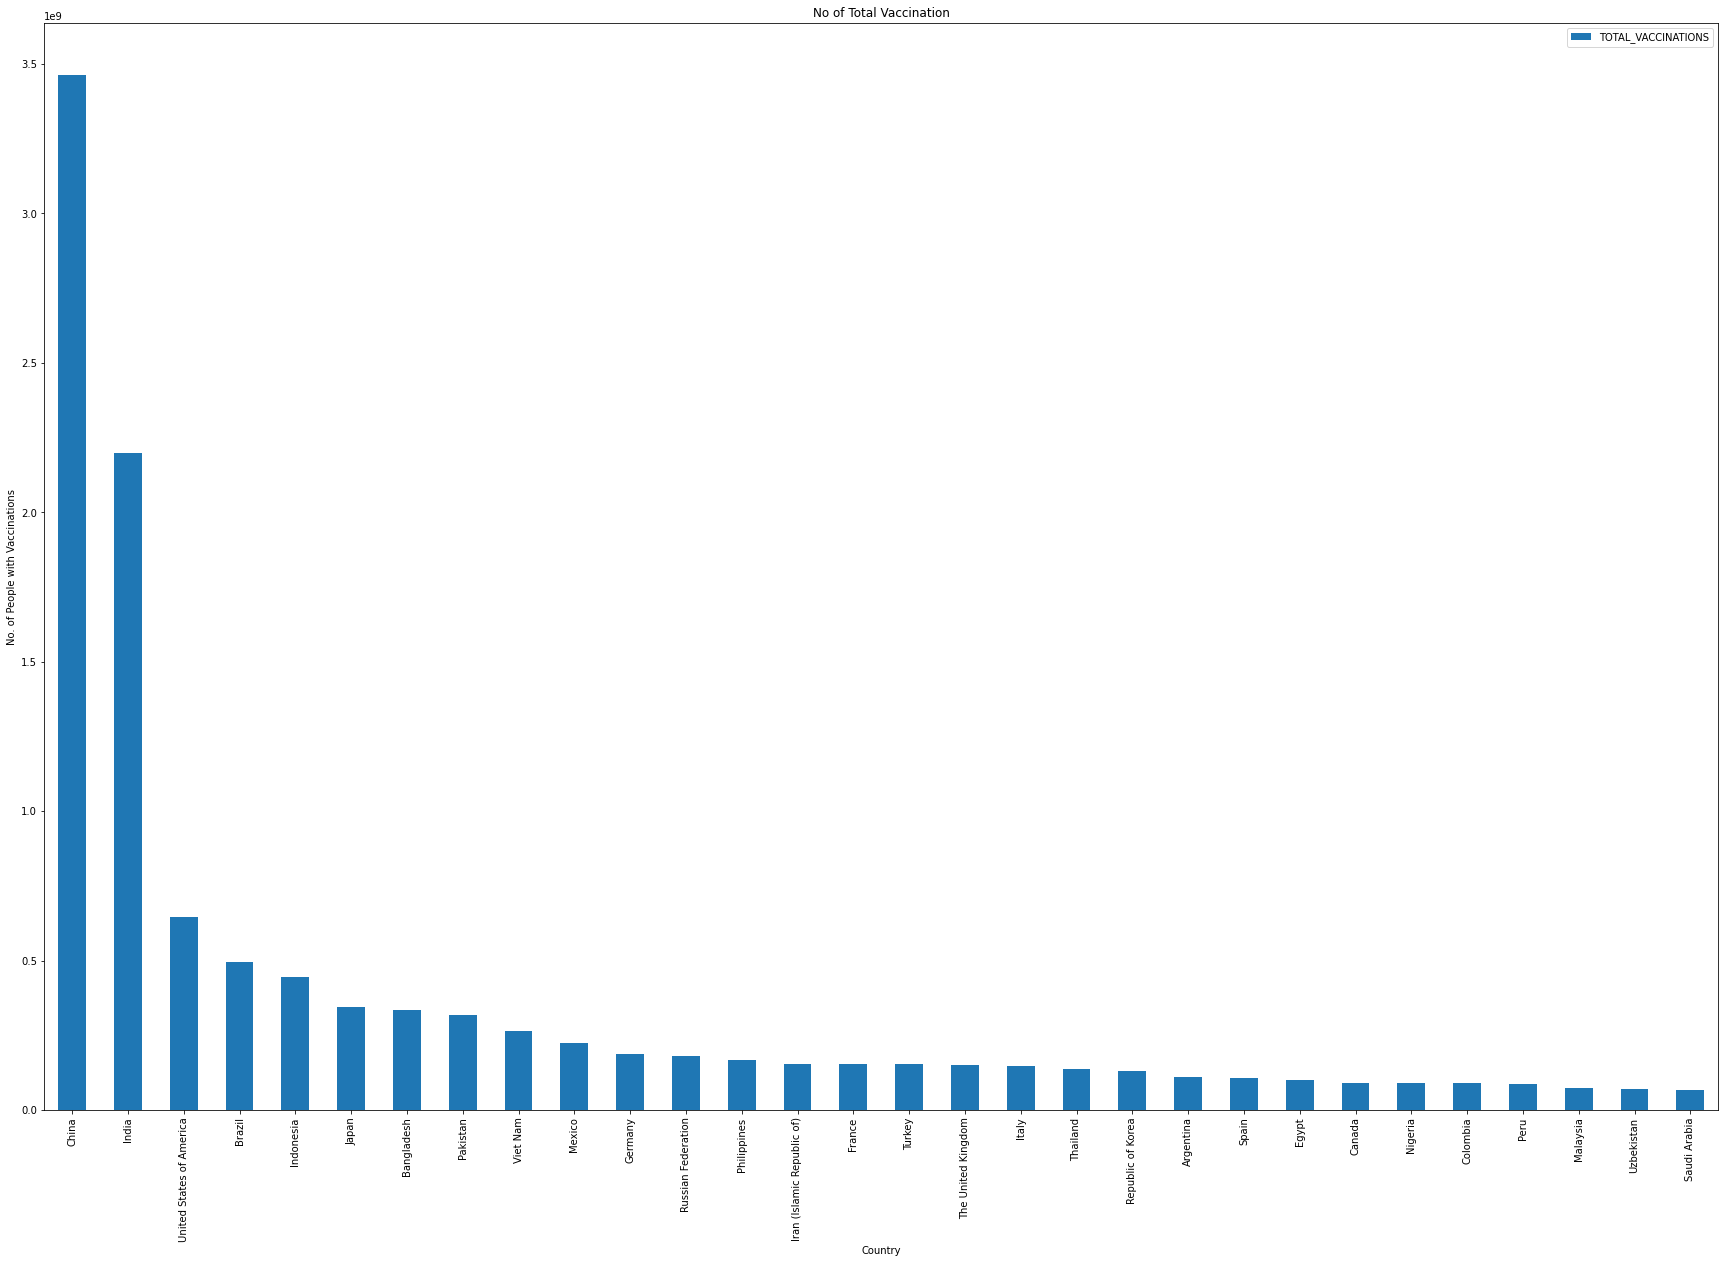

In [55]:
Total_Vaccinated.head(30).plot(kind='bar',  xlabel = 'Country', ylabel = 'No. of People with Vaccinations', title = 'No of Total Vaccination', figsize=(30,20))
plt.show()


In [56]:
Full_Vaccinated = pd.DataFrame(Vaccinated.groupby("COUNTRY")['PERSONS_FULLY_VACCINATED']
                               .agg('sum')).sort_values(by='PERSONS_FULLY_VACCINATED',ascending=False,axis=0)

Full_Vaccinated.head()

,PERSONS_FULLY_VACCINATED
COUNTRY,
China,1277348389
India,950763070
United States of America,225602016
Indonesia,174119714
Brazil,168409005


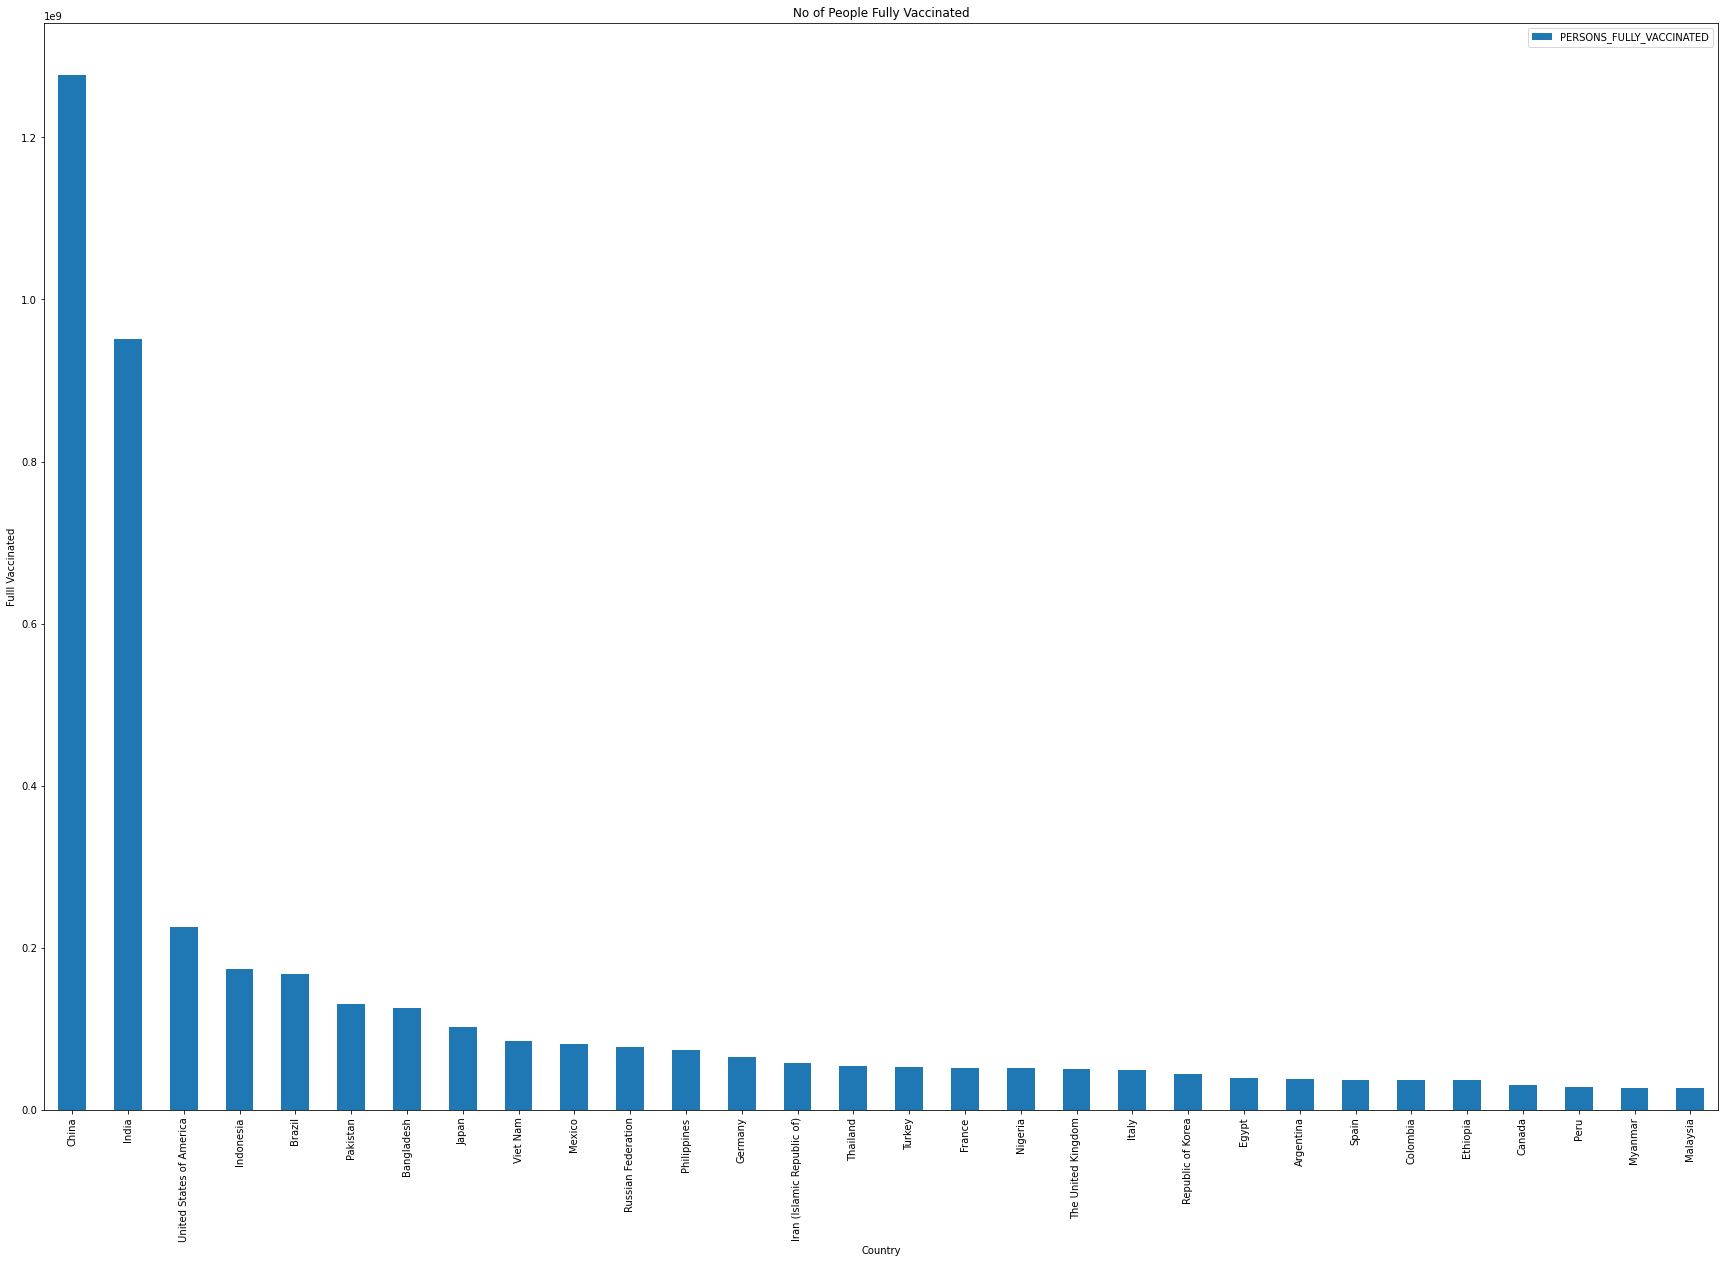

In [57]:
Full_Vaccinated.head(30).plot(kind='bar',  xlabel = 'Country', ylabel = 'Fulll Vaccinated',title = 'No of People Fully Vaccinated', figsize=(30,20))
plt.show()

In [58]:
PERSONS_BOOSTER_ADD_DOSE = pd.DataFrame(Vaccinated.groupby("COUNTRY")['PERSONS_BOOSTER_ADD_DOSE']
                               .agg('sum')).sort_values(by='PERSONS_BOOSTER_ADD_DOSE',ascending=False,axis=0)

PERSONS_BOOSTER_ADD_DOSE.head()

,PERSONS_BOOSTER_ADD_DOSE
COUNTRY,
China,803425507.0
India,221374949.0
United States of America,113031737.0
Brazil,106308588.0
Japan,84063402.0


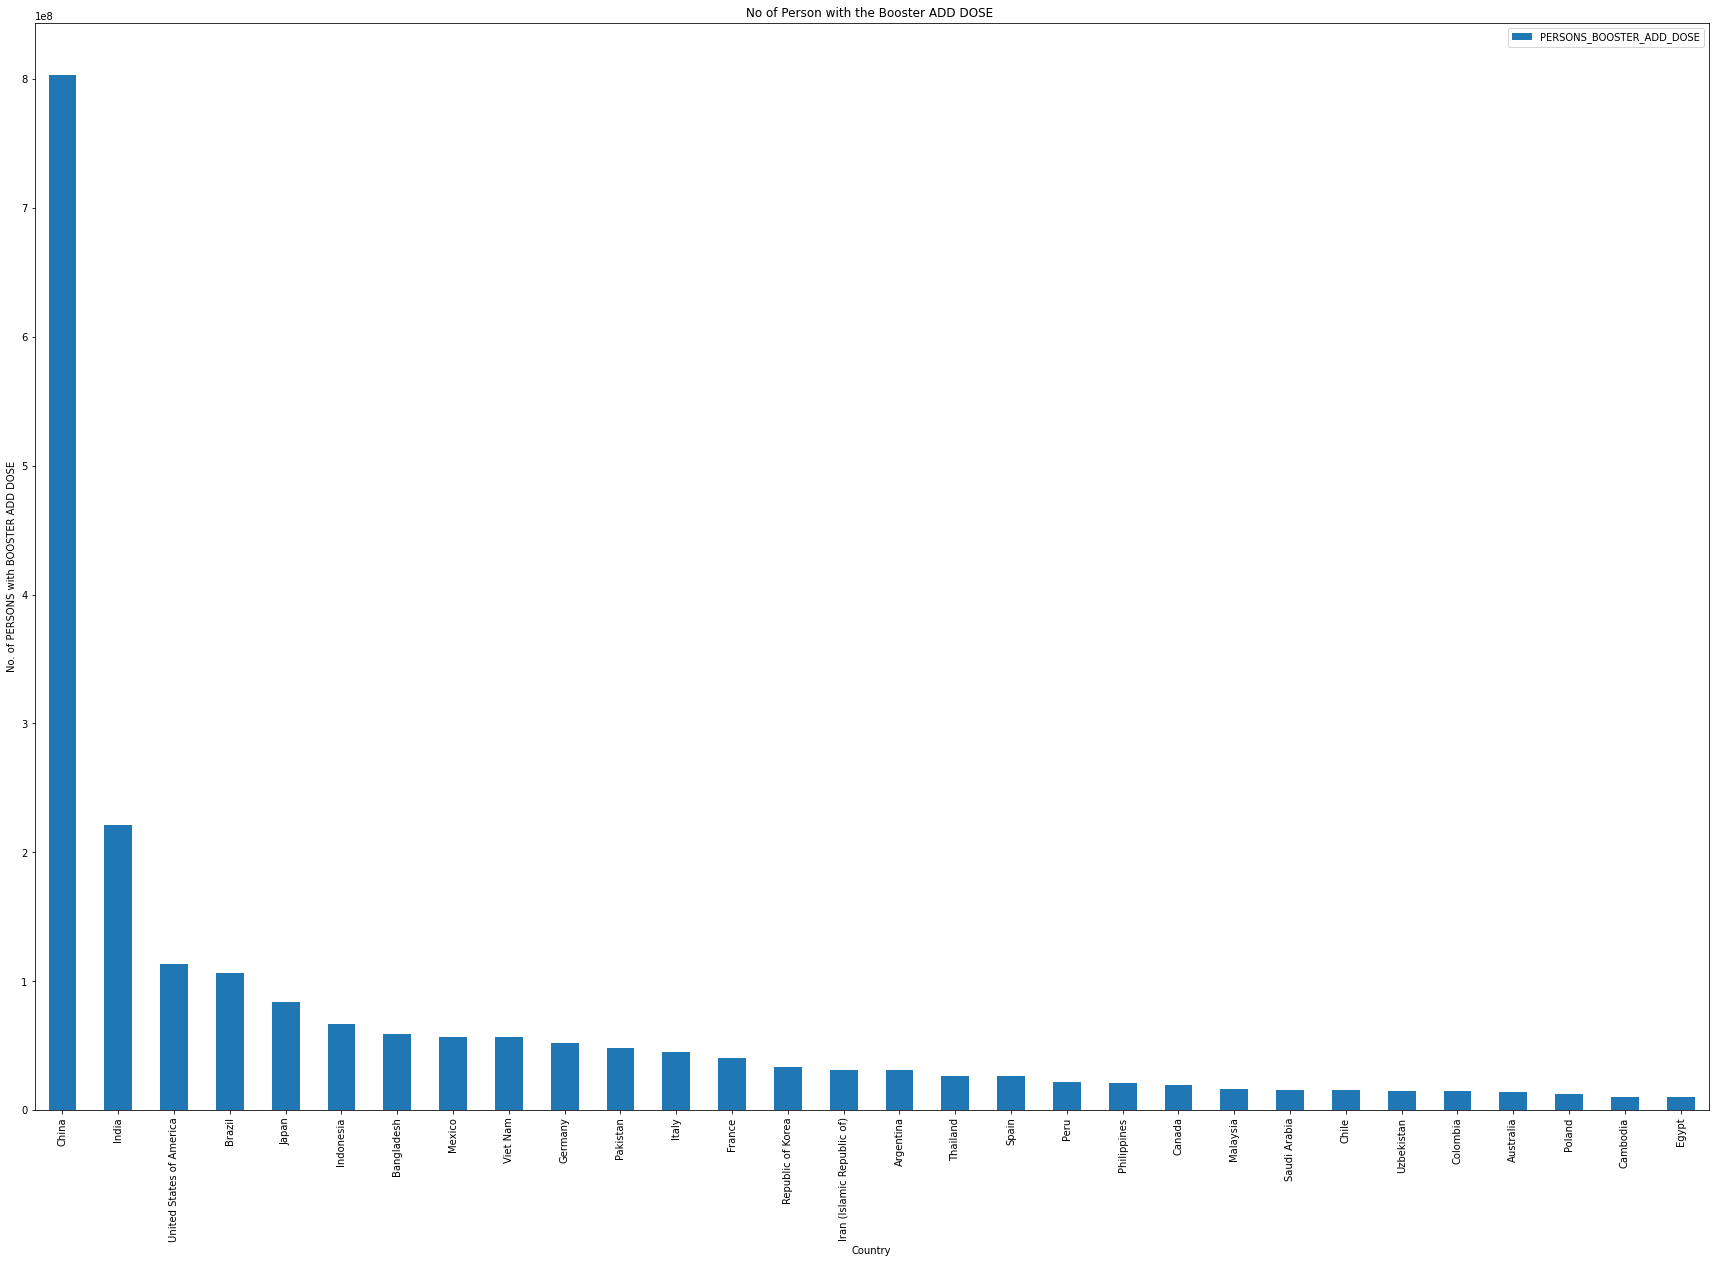

In [59]:
PERSONS_BOOSTER_ADD_DOSE.head(30).plot(kind='bar',  xlabel = 'Country', ylabel = 'No. of PERSONS with BOOSTER ADD DOSE',title = 'No of Person with the Booster ADD DOSE ', figsize=(30,20))
plt.show()

In [60]:
TOTAL_VACCINATIONS_year = pd.DataFrame(Vaccinated.groupby(["COUNTRY",'year'])['TOTAL_VACCINATIONS']
                               .agg('sum')).sort_values(by=['year', 'TOTAL_VACCINATIONS'],ascending=False,axis=0)

TOTAL_VACCINATIONS_year.head(10)

,,TOTAL_VACCINATIONS
COUNTRY,year,
China,2022,3.464049e+09
India,2022,2.199183e+09
United States of America,2022,6.473451e+08
Brazil,2022,4.937009e+08
Indonesia,2022,4.444601e+08
Japan,2022,3.433641e+08
Bangladesh,2022,3.332547e+08
Pakistan,2022,3.166522e+08
Viet Nam,2022,2.630405e+08


In [61]:
PERSONS_BOOSTER_ADD_DOSE_year = pd.DataFrame(Vaccinated.groupby(["COUNTRY",'year'])['PERSONS_BOOSTER_ADD_DOSE']
                               .agg('sum')).sort_values(by=['year', 'PERSONS_BOOSTER_ADD_DOSE'],ascending=False,axis=0)

PERSONS_BOOSTER_ADD_DOSE_year.head(10)

,,PERSONS_BOOSTER_ADD_DOSE
COUNTRY,year,
China,2022,803425507.0
India,2022,221374949.0
United States of America,2022,113031737.0
Brazil,2022,106308588.0
Japan,2022,84063402.0
Indonesia,2022,66624569.0
Bangladesh,2022,59077194.0
Mexico,2022,57026630.0
Viet Nam,2022,56988856.0


In [62]:
PERSONS_FULLY_VACCINATED_year = pd.DataFrame(Vaccinated.groupby(["COUNTRY",'year'])['PERSONS_FULLY_VACCINATED']
                               .agg('sum')).sort_values(by=['year', 'PERSONS_FULLY_VACCINATED'],ascending=False,axis=0)

PERSONS_FULLY_VACCINATED_year.head(10)

,,PERSONS_FULLY_VACCINATED
COUNTRY,year,
China,2022,1277348389
India,2022,950763070
United States of America,2022,225602016
Indonesia,2022,174119714
Brazil,2022,168409005
Pakistan,2022,131361137
Bangladesh,2022,125297977
Japan,2022,102975957
Viet Nam,2022,84690714


In [63]:
Vaccinated['year'].unique()

array([2022, 2021])

In [64]:
Vaccinated_cases_2021 = Vaccinated[Vaccinated['year']== 2021]

Vaccinated_cases_2021.head()

,COUNTRY,WHO_REGION,TOTAL_VACCINATIONS,PERSONS_FULLY_VACCINATED,PERSONS_BOOSTER_ADD_DOSE,DATE_UPDATED,year
26,"Bonaire, Sint Eustatius and Saba",AMRO,35845.0,16736,NaN,2021-09-01,2021
174,Saint Helena,AFRO,7892.0,3531,NaN,2021-05-05,2021


In [65]:
TOTAL_VACCINATIONS_year_2021 = pd.DataFrame(Vaccinated_cases_2021.groupby(["COUNTRY",'year'])['TOTAL_VACCINATIONS']
                               .agg('sum')).sort_values(by=['year', 'TOTAL_VACCINATIONS'],ascending=False,axis=0)

TOTAL_VACCINATIONS_year_2021.head(10)

,,TOTAL_VACCINATIONS
COUNTRY,year,
"Bonaire, Sint Eustatius and Saba",2021,35845.0
Saint Helena,2021,7892.0


In [66]:
PERSONS_BOOSTER_ADD_DOSE_year_2021 = pd.DataFrame(Vaccinated_cases_2021.groupby(["COUNTRY",'year'])['PERSONS_BOOSTER_ADD_DOSE']
                               .agg('sum')).sort_values(by=['year', 'PERSONS_BOOSTER_ADD_DOSE'],ascending=False,axis=0)

PERSONS_BOOSTER_ADD_DOSE_year_2021.head(10)

,,PERSONS_BOOSTER_ADD_DOSE
COUNTRY,year,
"Bonaire, Sint Eustatius and Saba",2021,0.0
Saint Helena,2021,0.0


#### Obviously there should be none since the case of taking boosters started in 2022

In [67]:
PERSONS_FULLY_VACCINATED_year_2021 = pd.DataFrame(Vaccinated_cases_2021.groupby(["COUNTRY",'year'])['PERSONS_FULLY_VACCINATED']
                               .agg('sum')).sort_values(by=['year', 'PERSONS_FULLY_VACCINATED'],ascending=False,axis=0)

PERSONS_FULLY_VACCINATED_year_2021.head(10)

,,PERSONS_FULLY_VACCINATED
COUNTRY,year,
"Bonaire, Sint Eustatius and Saba",2021,16736
Saint Helena,2021,3531


At 2021 citizens of Bonaire, Sint Eustatius and Saba and Saint Helena are the only ones that have fully vaccinated people.  

In [68]:
Vaccinated_cases_2022 = Vaccinated[Vaccinated['year']== 2022]

Vaccinated_cases_2022.head()

,COUNTRY,WHO_REGION,TOTAL_VACCINATIONS,PERSONS_FULLY_VACCINATED,PERSONS_BOOSTER_ADD_DOSE,DATE_UPDATED,year
0,Afghanistan,EMRO,12304901.0,10615628,NaN,2022-12-05,2022
1,Albania,EURO,3011499.0,1268200,371665.0,2022-11-13,2022
2,Algeria,AFRO,15267442.0,6481186,575651.0,2022-09-04,2022
3,American Samoa,WPRO,111316.0,41423,24160.0,2022-08-23,2022
4,Andorra,EURO,154367.0,53485,42981.0,2022-11-13,2022


In [69]:
TOTAL_VACCINATIONS_year_2022 = pd.DataFrame(Vaccinated_cases_2022.groupby(["COUNTRY",'year'])['TOTAL_VACCINATIONS']
                               .agg('sum')).sort_values(by=['year', 'TOTAL_VACCINATIONS'],ascending=False,axis=0)

TOTAL_VACCINATIONS_year_2022.head(10)

,,TOTAL_VACCINATIONS
COUNTRY,year,
China,2022,3.464049e+09
India,2022,2.199183e+09
United States of America,2022,6.473451e+08
Brazil,2022,4.937009e+08
Indonesia,2022,4.444601e+08
Japan,2022,3.433641e+08
Bangladesh,2022,3.332547e+08
Pakistan,2022,3.166522e+08
Viet Nam,2022,2.630405e+08


In [70]:
PERSONS_BOOSTER_ADD_DOSE_year_2022 = pd.DataFrame(Vaccinated_cases_2022.groupby(["COUNTRY",'year'])['PERSONS_BOOSTER_ADD_DOSE']
                               .agg('sum')).sort_values(by=['year', 'PERSONS_BOOSTER_ADD_DOSE'],ascending=False,axis=0)

PERSONS_BOOSTER_ADD_DOSE_year_2022.head(10)

,,PERSONS_BOOSTER_ADD_DOSE
COUNTRY,year,
China,2022,803425507.0
India,2022,221374949.0
United States of America,2022,113031737.0
Brazil,2022,106308588.0
Japan,2022,84063402.0
Indonesia,2022,66624569.0
Bangladesh,2022,59077194.0
Mexico,2022,57026630.0
Viet Nam,2022,56988856.0


#### We started collecting the booster dose in early 2022 since we need more doses to keep us immune from the virus

In [71]:
PERSONS_FULLY_VACCINATED_year_2022 = pd.DataFrame(Vaccinated_cases_2022.groupby(["COUNTRY",'year'])['PERSONS_FULLY_VACCINATED']
                               .agg('sum')).sort_values(by=['year', 'PERSONS_FULLY_VACCINATED'],ascending=False,axis=0)

PERSONS_FULLY_VACCINATED_year_2022.head(10)

,,PERSONS_FULLY_VACCINATED
COUNTRY,year,
China,2022,1277348389
India,2022,950763070
United States of America,2022,225602016
Indonesia,2022,174119714
Brazil,2022,168409005
Pakistan,2022,131361137
Bangladesh,2022,125297977
Japan,2022,102975957
Viet Nam,2022,84690714


## Conclusion

In this analysis, we've learn how china despite their population was able to vaccinate most of their citizen which help them to reduce the number of deaths and covid cases recent times and cumulatively and India seems to be impressive too.

We also have that `USA` has the most cases worldwide 

`Brazil` has the most cases in South America 

`India` has the most cases in Asia 

While for those Vaccinated

`China` has the most vaccinated person, booster done in the World and `Asia` 

